In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np

In [3]:
happiness=pd.read_csv('../data/world-happiness-report.csv')

In [4]:
happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [5]:
happiness.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

### Happiness is the outcome variable. It is measured by "Life Ladder"
### The other variables (GDP per capita, Social suppport, Life expectancy, Freedom, etc.) are factors that have an impact on happiness.

## Challenge 1: Find the top 10 happiest countries in the world

### Alternative 1: sort the dataframe by "Life Ladder" in reverse order and extract the first 10 rows.
### Alternative 2: groupby "Country name" and compute the mean of "Life Ladder", then sort in reverse order and extract the first 10 rows

In [6]:
lifeladderDataFrame=happiness.sort_values(by='Life Ladder',ascending=False)

In [7]:
lifeladderDataFrame.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
451,Denmark,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
563,Finland,2020,7.889,10.750,0.962,72.10,0.962,-0.116,0.164,0.744,0.193
561,Finland,2018,7.858,10.783,0.962,71.90,0.938,-0.127,0.199,0.782,0.182
450,Denmark,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
560,Finland,2017,7.788,10.768,0.964,71.80,0.962,-0.002,0.192,0.787,0.176
454,Denmark,2011,7.788,10.848,0.962,70.62,0.935,0.298,0.220,0.769,0.175
562,Finland,2019,7.780,10.792,0.937,72.00,0.948,-0.052,0.195,0.755,0.181
1654,Switzerland,2012,7.776,11.079,0.947,72.78,0.945,0.139,0.323,0.859,0.176
453,Denmark,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155


In [8]:
lifeladderDataFrame=pd.DataFrame(happiness.groupby('Country name')['Life Ladder'].mean())

In [9]:
lifeladderDataFrame

,Life Ladder
Country name,
Afghanistan,3.594667
Albania,5.019385
Algeria,5.389875
Angola,4.420250
Argentina,6.310133
...,...
Venezuela,6.019867
Vietnam,5.305857
Yemen,3.912250


In [10]:
lifeladderDataFrame.sort_values(by='Life Ladder',ascending=False).head(10)

,Life Ladder
Country name,
Denmark,7.680400
Finland,7.597154
Switzerland,7.548300
Norway,7.512400
Netherlands,7.466286
Iceland,7.446500
Canada,7.376333
Sweden,7.369467
New Zealand,7.310286


## Challenge 2: Compare the 5 happiest countries in the world with the 5 least happy ones


### Tip: find the top 5 and the bottom 5 countries, then filter the original dataframe to extract observations specific to those countries, finally visualize the results
### Tip: you can create a composite filter contatenating each country with an OR operator

In [11]:
lifeladderDataFrame=pd.DataFrame(happiness.groupby('Country name')['Life Ladder'].mean())

In [12]:
top5countries=lifeladderDataFrame.sort_values(by='Life Ladder',ascending=False).head(5)

In [13]:
top5countries

,Life Ladder
Country name,
Denmark,7.680400
Finland,7.597154
Switzerland,7.548300
Norway,7.512400
Netherlands,7.466286


In [14]:
bottom5countries=lifeladderDataFrame.sort_values(by='Life Ladder',ascending=True).head(5)

In [15]:
bottom5countries

,Life Ladder
Country name,
South Sudan,3.402000
Central African Republic,3.515000
Burundi,3.548200
Togo,3.555000
Afghanistan,3.594667


In [16]:
DenmarkFilter=(happiness['Country name']=='Denmark')

In [17]:
happiness[DenmarkFilter].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
450,Denmark,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
451,Denmark,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
452,Denmark,2009,7.683,10.824,0.939,70.24,0.949,0.264,0.206,0.749,0.234
453,Denmark,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155


In [18]:
FinlandFilter=(happiness['Country name']=='Finland')

In [19]:
happiness[FinlandFilter].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
551,Finland,2006,7.672,10.745,0.965,69.76,0.969,-0.005,0.132,0.722,0.172
552,Finland,2008,7.671,10.796,0.951,70.08,0.934,0.028,0.217,0.773,0.144
553,Finland,2010,7.393,10.734,0.935,70.40,0.916,0.091,0.413,0.832,0.202
554,Finland,2011,7.354,10.754,0.938,70.64,0.936,0.101,0.320,0.773,0.205
555,Finland,2012,7.420,10.735,0.928,70.88,0.921,-0.001,0.361,0.796,0.202


In [20]:
SwitzerlandFilter=(happiness['Country name']=='Switzerland')

In [21]:
happiness[SwitzerlandFilter].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1652,Switzerland,2006,7.473,11.050,0.951,71.54,0.919,0.290,0.408,0.821,0.212
1653,Switzerland,2009,7.525,11.055,0.938,72.26,0.891,0.125,0.342,0.814,0.202
1654,Switzerland,2012,7.776,11.079,0.947,72.78,0.945,0.139,0.323,0.859,0.176
1655,Switzerland,2014,7.493,11.098,0.959,73.06,0.949,0.060,0.283,0.823,0.189
1656,Switzerland,2015,7.572,11.100,0.938,73.20,0.928,0.109,0.210,0.809,0.166


In [22]:
NorwaylandFilter=(happiness['Country name']=='Norway')

In [23]:
happiness[NorwaylandFilter].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1300,Norway,2006,7.416,11.031,0.959,71.32,0.960,0.109,0.397,0.832,0.197
1301,Norway,2008,7.632,11.042,0.936,71.56,0.947,0.018,0.503,0.792,0.155
1302,Norway,2012,7.678,11.017,0.948,72.24,0.947,0.147,0.368,0.823,0.213
1303,Norway,2014,7.444,11.024,0.941,72.68,0.956,0.181,0.405,0.834,0.194
1304,Norway,2015,7.603,11.033,0.947,72.90,0.948,0.257,0.299,0.843,0.209


In [24]:
NetherlandsFilter=(happiness['Country name']=='Netherlands')

In [25]:
happiness[NetherlandsFilter].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1211,Netherlands,2005,7.464,10.814,0.947,70.40,0.901,NaN,0.571,0.869,0.233
1212,Netherlands,2007,7.452,10.881,0.944,70.80,0.896,0.344,0.445,0.818,0.213
1213,Netherlands,2008,7.631,10.899,0.944,71.00,0.883,0.365,0.419,0.788,0.182
1214,Netherlands,2010,7.502,10.864,0.957,71.40,0.921,0.349,0.399,0.853,0.206
1215,Netherlands,2011,7.564,10.875,0.938,71.52,0.925,0.336,0.359,0.863,0.181


In [26]:
bottom5countries

,Life Ladder
Country name,
South Sudan,3.402000
Central African Republic,3.515000
Burundi,3.548200
Togo,3.555000
Afghanistan,3.594667


In [27]:
SouthsudanFilter=(happiness['Country name']=='South Sudan')

In [28]:
happiness[SouthsudanFilter]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1596,South Sudan,2014,3.832,NaN,0.545,49.84,0.567,NaN,0.742,0.614,0.428
1597,South Sudan,2015,4.071,NaN,0.585,50.20,0.512,NaN,0.710,0.586,0.450
1598,South Sudan,2016,2.888,NaN,0.532,50.60,0.440,NaN,0.785,0.615,0.549
1599,South Sudan,2017,2.817,NaN,0.557,51.00,0.456,NaN,0.761,0.586,0.517


In [29]:
CARFilter=(happiness['Country name']=='Central African Republic')

In [30]:
happiness[CARFilter]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
308,Central African Republic,2007,4.160,6.987,0.532,40.90,0.663,0.081,0.782,0.568,0.330
309,Central African Republic,2010,3.568,7.091,0.483,42.70,0.690,-0.036,0.845,0.523,0.257
310,Central African Republic,2011,3.678,7.125,0.387,43.08,0.780,-0.016,0.834,0.524,0.277
311,Central African Republic,2016,2.693,6.785,0.290,44.90,0.624,0.033,0.859,0.579,0.494
312,Central African Republic,2017,3.476,6.817,0.320,45.20,0.645,0.073,0.890,0.614,0.599


In [31]:
BurundiFilter=(happiness['Country name']=='Burundi')

In [32]:
happiness[BurundiFilter]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
258,Burundi,2008,3.563,6.719,0.291,49.02,0.260,-0.019,0.860,0.440,0.253
259,Burundi,2009,3.792,6.723,0.326,49.66,0.427,-0.019,0.718,0.641,0.164
260,Burundi,2011,3.706,6.748,0.422,50.68,0.490,-0.062,0.677,0.689,0.190
261,Burundi,2014,2.905,6.787,0.565,51.82,0.431,-0.059,0.808,0.656,0.251
262,Burundi,2018,3.775,6.635,0.485,53.40,0.646,-0.024,0.599,0.666,0.363


In [33]:
TogoFilter=(happiness['Country name']=='Togo')

In [34]:
happiness[TogoFilter]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1727,Togo,2006,3.202,7.078,0.435,49.26,0.628,-0.007,0.850,0.615,0.348
1728,Togo,2008,2.808,7.052,0.291,50.18,0.287,-0.055,0.932,0.362,0.379
1729,Togo,2011,2.936,7.146,0.303,51.58,0.584,-0.070,0.832,0.480,0.395
1730,Togo,2014,2.839,7.247,0.444,53.02,0.663,-0.085,0.795,0.583,0.443
1731,Togo,2015,3.768,7.277,0.479,53.50,0.772,-0.069,0.733,0.599,0.416
1732,Togo,2016,3.879,7.306,0.509,53.90,0.730,-0.007,0.815,0.604,0.483
1733,Togo,2017,4.361,7.324,0.508,54.30,0.717,-0.042,0.726,0.614,0.426
1734,Togo,2018,4.023,7.348,0.596,54.70,0.612,-0.007,0.809,0.608,0.446
1735,Togo,2019,4.179,7.375,0.539,55.10,0.617,0.065,0.737,0.590,0.444


In [35]:
AfghanistanFilter=(happiness['Country name']=='Afghanistan')

In [36]:
happiness[AfghanistanFilter]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [37]:
happinesstop5andbottom5=pd.concat([happiness[DenmarkFilter],
                         happiness[FinlandFilter],
                         happiness[SwitzerlandFilter],
                         happiness[NorwaylandFilter],
                         happiness[NetherlandsFilter],
                        happiness[AfghanistanFilter],
                         happiness[TogoFilter],
                        happiness[BurundiFilter],
                        happiness[CARFilter],
                        happiness[SouthsudanFilter]],axis=0)

In [38]:
happinesstop5andbottom5

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
450,Denmark,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
451,Denmark,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
452,Denmark,2009,7.683,10.824,0.939,70.24,0.949,0.264,0.206,0.749,0.234
453,Denmark,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155
...,...,...,...,...,...,...,...,...,...,...,...
312,Central African Republic,2017,3.476,6.817,0.320,45.20,0.645,0.073,0.890,0.614,0.599
1596,South Sudan,2014,3.832,NaN,0.545,49.84,0.567,NaN,0.742,0.614,0.428
1597,South Sudan,2015,4.071,NaN,0.585,50.20,0.512,NaN,0.710,0.586,0.450
1598,South Sudan,2016,2.888,NaN,0.532,50.60,0.440,NaN,0.785,0.615,0.549


In [39]:
happinessDataFrame=pd.DataFrame(happinesstop5andbottom5.groupby('Country name')
                                [['Life Ladder',
                                  'Log GDP per capita',
                                  'Social support',
                                  'Healthy life expectancy at birth',
                                 'Freedom to make life choices',
                                 'Perceptions of corruption',
                                 'Positive affect',
                                 'Negative affect']].mean())

In [40]:
happinessDataFrame

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.843333,0.548667,0.326500
Burundi,3.548200,6.722400,0.417800,50.916000,0.450800,0.732400,0.618400,0.244200
Central African Republic,3.515000,6.961000,0.402400,43.356000,0.680400,0.842000,0.561600,0.391400
Denmark,7.680400,10.879200,0.957133,71.169333,0.945067,0.200467,0.813733,0.197200
Finland,7.597154,10.749923,0.949000,71.180000,0.939692,0.249000,0.774231,0.186462
Netherlands,7.466286,10.886786,0.933500,71.707143,0.907429,0.414929,0.842500,0.213000
Norway,7.512400,11.039100,0.950500,72.670000,0.954400,0.344200,0.829600,0.200300
South Sudan,3.402000,NaN,0.554750,50.410000,0.493750,0.749500,0.600250,0.486000
Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.305900,0.803800,0.190300


In [41]:
happinessDataFrame1=happinessDataFrame.sort_values(by='Life Ladder',ascending=False)

In [42]:
happinessDataFrame1

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,
Denmark,7.680400,10.879200,0.957133,71.169333,0.945067,0.200467,0.813733,0.197200
Finland,7.597154,10.749923,0.949000,71.180000,0.939692,0.249000,0.774231,0.186462
Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.305900,0.803800,0.190300
Norway,7.512400,11.039100,0.950500,72.670000,0.954400,0.344200,0.829600,0.200300
Netherlands,7.466286,10.886786,0.933500,71.707143,0.907429,0.414929,0.842500,0.213000
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.843333,0.548667,0.326500
Togo,3.555000,7.239222,0.456000,52.837778,0.623333,0.803222,0.561667,0.420000
Burundi,3.548200,6.722400,0.417800,50.916000,0.450800,0.732400,0.618400,0.244200
Central African Republic,3.515000,6.961000,0.402400,43.356000,0.680400,0.842000,0.561600,0.391400


### Challenge 3: Which factors have an impact on happiness ?


#### Tip: consider computing the correlation between variables
#### Tip: consider https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

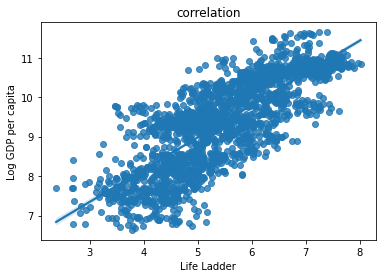

In [44]:
ax = sns.regplot(x='Life Ladder', y='Log GDP per capita', data=happiness)
ax.set_title('correlation');
ax.set_xlabel('Life Ladder');
ax.set_ylabel('Log GDP per capita');

In [ ]:
ax = sns.regplot(x='Life Ladder', y='Log GDP per capita', data=happiness)
ax.set_title('correlation');
ax.set_xlabel('Life Ladder');
ax.set_ylabel('Log GDP per capita');